## Librairies

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

## Extracting/Formatting the datas

In [112]:

dataset = pd.read_csv('../dataset_phishing.csv')

# Balancing the entries based on TV (=['label'])
phishing_sample = dataset[dataset['status'] == 'phishing'].sample(n=1000, random_state=42)
legitimate_sample = dataset[dataset['status'] == 'legitimate'].sample(n=1000, random_state=42)
dataset_sample = pd.concat([phishing_sample, legitimate_sample])

dataset_sample = dataset_sample.rename(columns={'status': 'label', 'length_url': 'url_length', 'ip':'starts_with_ip', 'nb_dots':'dot_count', 'nb_at':'at_count', 'nb_tilde': 'tld_count', 'nb_dslash': 'dash_count'})

import pandas as pd
import numpy as np
from scipy.stats import entropy
from collections import Counter
import unicodedata
from urllib.parse import urlparse

def is_punycode(value):
    if not isinstance(value, str):
        return False

    # Vérifie si la chaîne est ASCII
    def is_ascii(s):
        return all(ord(c) < 128 for c in s)

    if not is_ascii(value):
        return False

    # Vérifie si la chaîne est encodée en UTF-8
    if not isinstance(value, str) or unicodedata.normalize('NFC', value) != value:
        raise ValueError("The string should be encoded by UTF-8 to do the right check.")

    # Vérifie si la chaîne commence par 'xn--'
    return value.lower().startswith('xn--')


def calculate_url_entropy(url):
    if not isinstance(url, str) or len(url) == 0:
        return 0
    
    char_counts = Counter(url)
    probabilities = np.array(list(char_counts.values())) / len(url)
    return entropy(probabilities, base=2)

def calculate_letter_ratio(url):
    if not isinstance(url, str) or len(url) == 0:
        return 0.0
    letter_count = sum(c.isalpha() for c in url)
    return letter_count / len(url)

def calculate_subdomain_count(url):
    return len(urlparse(url).netloc.split('.'))

def calculate_has_internal_links(url):
    try:
        return '#' in urlparse(url).fragment
    except:
        return False

def domain_has_digit(url):
    try:
        domain = urlparse(url).netloc
        return any(c.isdigit() for c in domain)
    except:
        return False
    
def nan_char_entropy(url):
    if not isinstance(url, str) or len(url) == 0:
        return 0.0
    non_alpha_chars = ''.join(c for c in url if not c.isalnum())
    if len(non_alpha_chars) == 0:
        return 0.0
    char_counts = Counter(non_alpha_chars)
    probabilities = np.array(list(char_counts.values())) / len(non_alpha_chars)
    return entropy(probabilities, base=2)

dataset_sample['url_entropy'] = dataset_sample['url'].apply(calculate_url_entropy)
dataset_sample['has_punycode'] = dataset_sample['url'].apply(is_punycode)
dataset_sample['digit_letter_ratio'] = dataset_sample['url'].apply(calculate_letter_ratio)
dataset_sample['subdomain_count'] = dataset_sample['url'].apply(calculate_subdomain_count)
dataset_sample['has_internal_links'] = dataset_sample['url'].apply(calculate_has_internal_links)
dataset_sample['domain_has_digit'] = dataset_sample['url'].apply(domain_has_digit)
dataset_sample['nan_char_entropy'] = dataset_sample['url'].apply(nan_char_entropy)





#output_path = "../dataset_phishing.csv"
#data.to_csv(output_path, index=False)

#print(f"Les entropies des URLs ont été calculées et enregistrées dans {output_path}.")





In [113]:
dataset_sample = dataset_sample[['label','url_length', 'starts_with_ip', 'url_entropy', 'has_punycode','digit_letter_ratio', 'dot_count', 'at_count', 'dash_count', 'tld_count', 'domain_has_digit', 'subdomain_count', 'nan_char_entropy', 'has_internal_links']]
#dataset_sample = dataset_sample.drop(columns=['length_hostname', 'nb_hyphens', 'google_index', 'page_rank', 'dns_record', 'domain_age', 'whois_registered_domain'])
dataset_sample.dtypes

label                  object
url_length              int64
starts_with_ip          int64
url_entropy           float64
has_punycode             bool
digit_letter_ratio    float64
dot_count               int64
at_count                int64
dash_count              int64
tld_count               int64
domain_has_digit         bool
subdomain_count         int64
nan_char_entropy      float64
has_internal_links       bool
dtype: object

## Verification

In [114]:
dataset_sample.shape
dataset_sample['label'].describe()

count         2000
unique           2
top       phishing
freq          1000
Name: label, dtype: object

(array([1000.,    0., 1000.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <BarContainer object of 3 artists>)

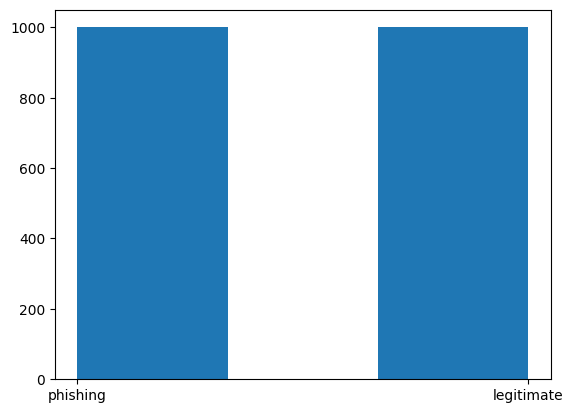

In [115]:
plt.hist(dataset_sample['label'], density=False, bins= 3 ) # attribut ??

## Saving

In [116]:
# To csv
dataset_sample.to_csv('/Users/louise_monciero/Desktop/APU/Machine_Learning/Assignement/sample_output_2.csv', index=False)